In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.style.use("seaborn-v0_8-darkgrid")

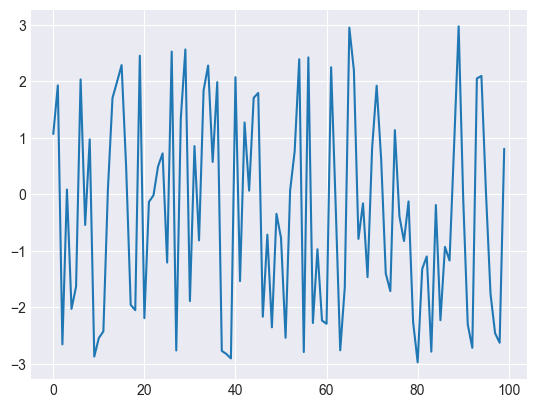

In [ ]:
m = 100
x = 6 * np.random.rand(m, 1) - 3

plt.plot(x);

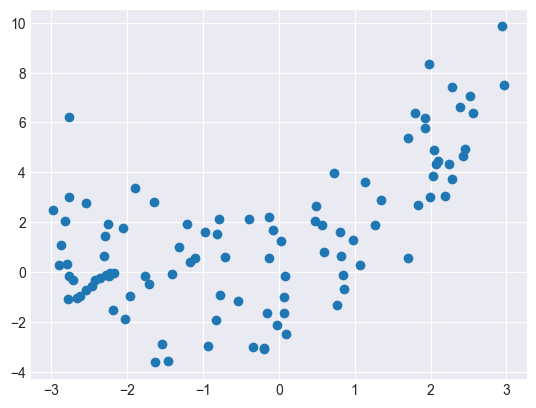

In [5]:
y = 0.5 * x ** 2 + x + 2 * np.random.randn(m, 1)
plt.scatter(x, y);

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias=False)

x_poly = poly_features.fit_transform(x)
x_poly

array([[ 1.06566089e+00,  1.13563312e+00],
       [ 1.92559320e+00,  3.70790916e+00],
       [-2.65574505e+00,  7.05298179e+00],
       [ 8.35200100e-02,  6.97559207e-03],
       [-2.02866138e+00,  4.11546698e+00],
       [-1.63608338e+00,  2.67676883e+00],
       [ 2.03141646e+00,  4.12665285e+00],
       [-5.43341614e-01,  2.95220110e-01],
       [ 9.71292512e-01,  9.43409144e-01],
       [-2.87146220e+00,  8.24529516e+00],
       [-2.54435092e+00,  6.47372161e+00],
       [-2.42558305e+00,  5.88345311e+00],
       [ 9.93502650e-02,  9.87047515e-03],
       [ 1.70347911e+00,  2.90184109e+00],
       [ 1.98752894e+00,  3.95027130e+00],
       [ 2.28451392e+00,  5.21900385e+00],
       [ 4.74808230e-01,  2.25442855e-01],
       [-1.95760700e+00,  3.83222516e+00],
       [-2.05122421e+00,  4.20752076e+00],
       [ 2.45124262e+00,  6.00859038e+00],
       [-2.19255915e+00,  4.80731564e+00],
       [-1.35915514e-01,  1.84730269e-02],
       [-1.84066146e-02,  3.38803462e-04],
       [ 4.

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
lin_reg.intercept_

array([-0.05644769])

In [9]:
lin_reg.coef_

array([[1.14517624, 0.56018971]])

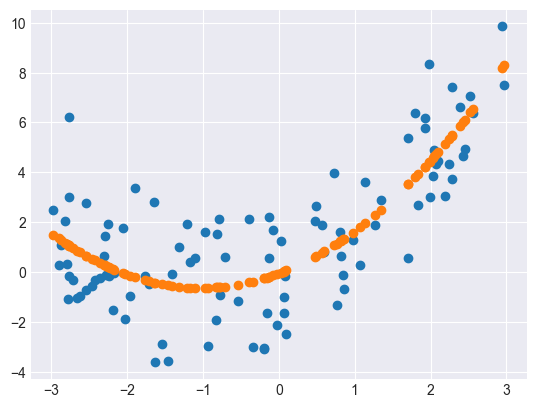

In [17]:
plt.scatter(x, y)
plt.scatter(x, lin_reg.predict(x_poly));

### Balanço Vies Variância

(-3.0, 3.0)

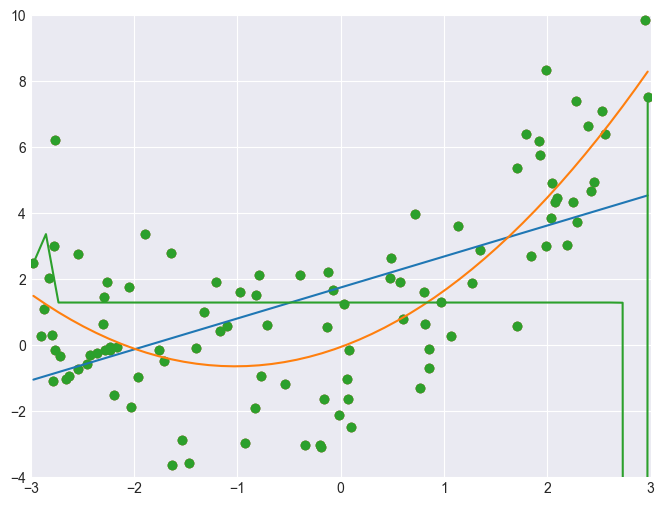

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))

for degree in [1, 2, 300]:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    x_seq = np.linspace(x.min(), x.max(), 50).reshape(-1,1)
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)
    plt.scatter(x, y)
    x_seq_transf = poly_features.fit_transform(x_seq)
    plt.plot(x_seq, lin_reg.predict(x_seq_transf), label=degree)

ax.set_ylim([-4, 10])
ax.set_xlim([-3, 3])

modelos complexos demais geram excesso de variancia (overfitting) e simples demais problemas de viés (underfitting)

### Ridge Regression

Penalizar o modelo qndo começa a ficar mt complexo

Função de custo antes era MSE(theta) .. adicionaremos alpha * 1/2 * sum(theta_i)

(-4.0, 4.0)

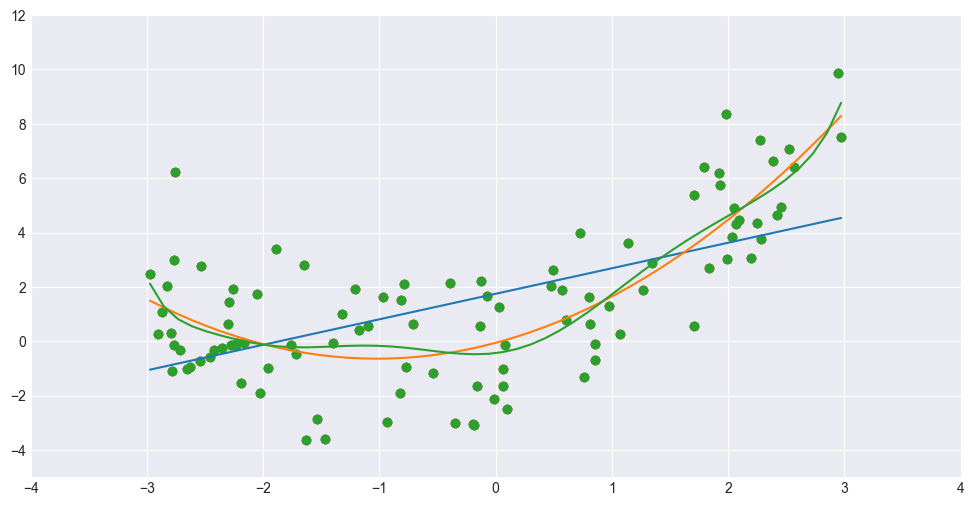

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))

for degree in [1, 2, 10]:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    x_seq = np.linspace(x.min(), x.max(), 50).reshape(-1,1)
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)
    plt.scatter(x, y)
    x_seq_transf = poly_features.fit_transform(x_seq)
    plt.plot(x_seq, lin_reg.predict(x_seq_transf), label=degree)

ax.set_ylim([-5, 12])
ax.set_xlim([-4, 4])

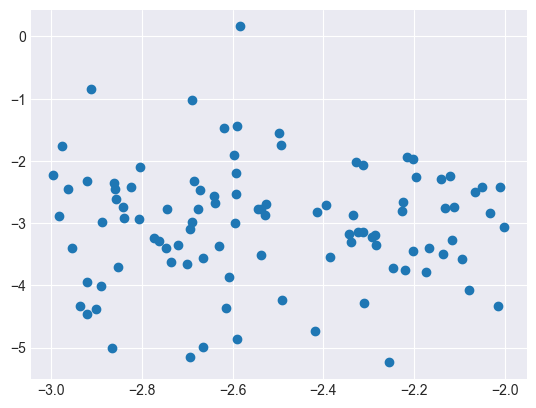

In [39]:
m = 100
x = np.random.rand(m, 1) - 3
y = np.random.randn(m, 1) - 3

plt.scatter(x, y);

In [46]:
from sklearn.linear_model import Ridge

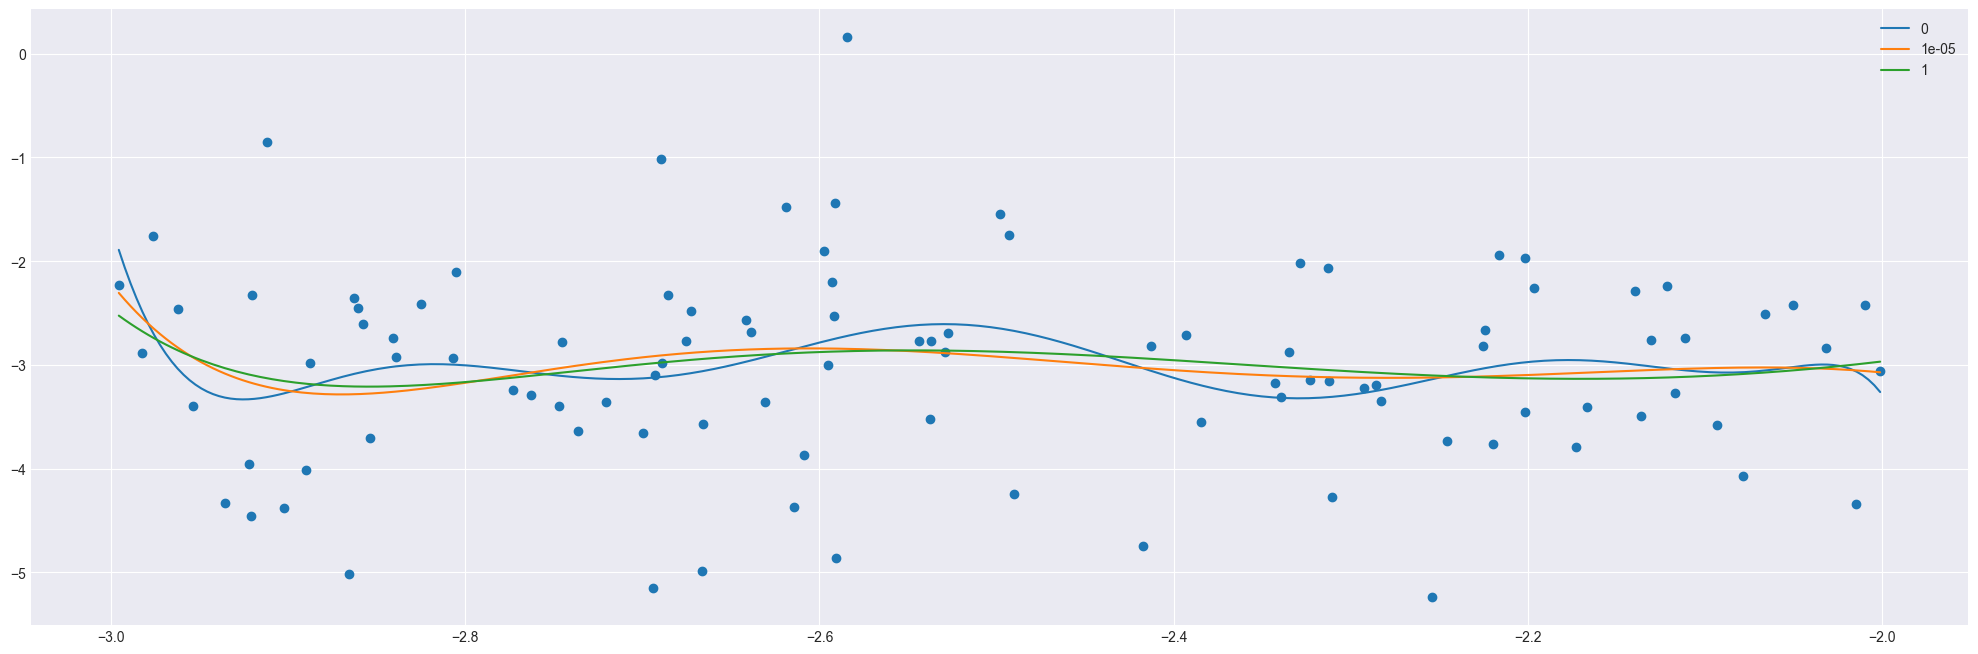

In [48]:
fig, ax = plt.subplots(figsize=(25,8))
plt.scatter(x, y)

for alpha in [0, 1e-5, 1]:
    poly_features = PolynomialFeatures(degree=10, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    x_seq = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)

    ridge_reg = Ridge(alpha = alpha, solver ="cholesky")
    ridge_reg.fit(x_poly, y)

    x_seq_transf = poly_features.fit_transform(x_seq)
    plt.plot(x_seq, ridge_reg.predict(x_seq_transf), label=alpha)

ax.legend()
plt.show()